In [2]:
from random import sample
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

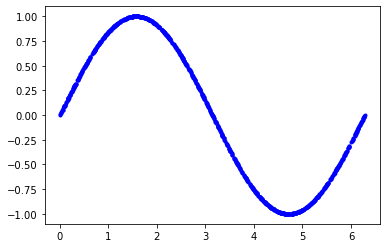

In [3]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

x_values = np.random.uniform(low=0,high=2*math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)

plt.plot(x_values, y_values, 'b.')
plt.show()

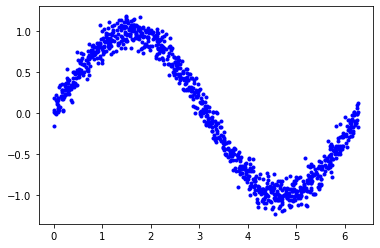

In [4]:
y_values += 0.1 * np.random.randn(*y_values.shape)

plt.plot(x_values, y_values, 'b.')
plt.show()

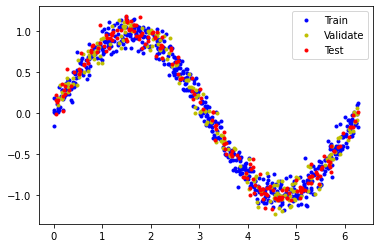

In [31]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

plt.plot(x_train, y_train, 'b.',label="Train")
plt.plot(x_validate, y_validate, 'y.',label="Validate")
plt.plot(x_test, y_test, 'r.',label="Test")


plt.legend()
plt.show()

In [8]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
model_1.add(layers.Dense(1))

model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [9]:
history_1 = model_1.fit(x_train,y_train, epochs=1000,batch_size=16,validation_data=(x_validate,y_validate))

Epoch 1/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 921us/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 1ms/step - loss: 

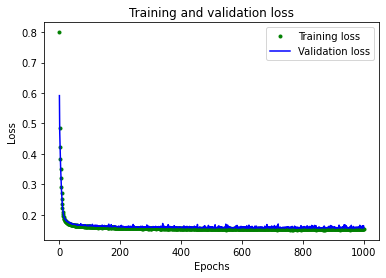

In [10]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

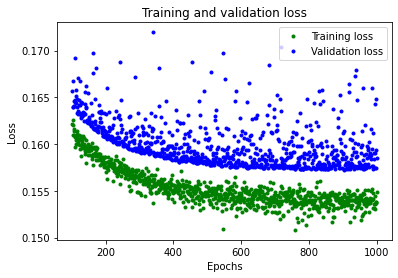

In [15]:
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

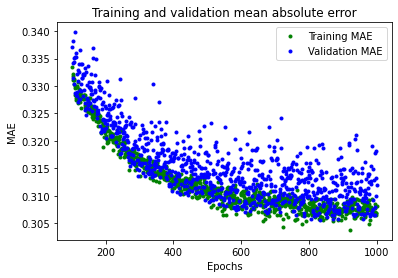

In [16]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

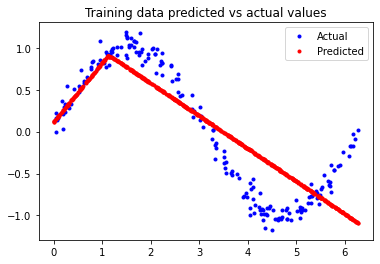

In [17]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)
# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [18]:
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16, validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 [==============================] - 0s 4ms/step - loss: 0.7137 - mae: 0.7311 - val_loss: 0.4662 - val_mae: 0.6012
Epoch 2/600
38/38 [==============================] - 0s 1ms/step - loss: 0.3890 - mae: 0.5420 - val_loss: 0.3745 - val_mae: 0.5205
Epoch 3/600
38/38 [==============================] - 0s 1ms/step - loss: 0.3183 - mae: 0.4884 - val_loss: 0.3078 - val_mae: 0.4784
Epoch 4/600
38/38 [==============================] - 0s 1ms/step - loss: 0.2622 - mae: 0.4452 - val_loss: 0.2525 - val_mae: 0.4323
Epoch 5/600
38/38 [==============================] - 0s 1ms/step - loss: 0.2180 - mae: 0.4095 - val_loss: 0.2074 - val_mae: 0.3926
Epoch 6/600
38/38 [==============================] - 0s 1ms/step - loss: 0.1853 - mae: 0.3783 - val_loss: 0.1887 - val_mae: 0.3702
Epoch 7/600
38/38 [==============================] - 0s 1ms/step - loss: 0.1667 - mae: 0.3572 - val_loss: 0.1682 - val_mae: 0.3546
Epoch 8/600
38/38 [==============================] - 0s 1ms/step - loss: 0.1532 - m

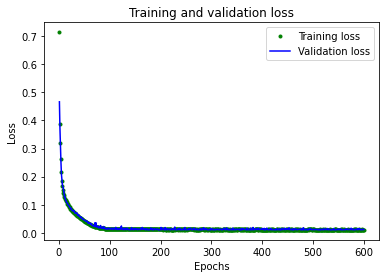

In [20]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


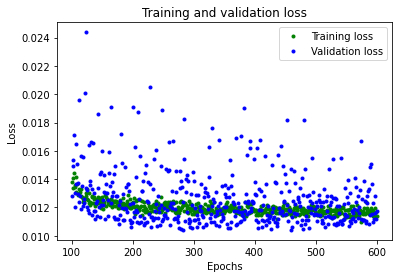

In [24]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
#plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


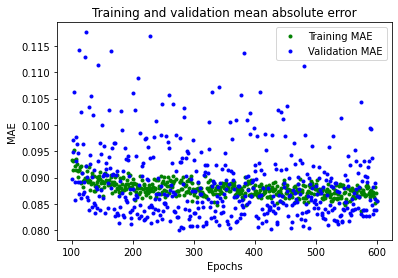

In [25]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 1ms/step - loss: 0.0096 - mae: 0.0773


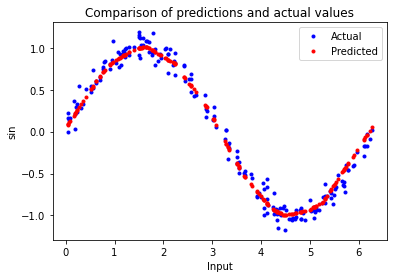

In [29]:
loss = model_2.evaluate(x_test, y_test)

predictions = model_2.predict(x_test)

plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test,'b.', label="Actual")
plt.plot(x_test,predictions,'r.',label="Predicted")
plt.xlabel('Input')
plt.ylabel('sin')
plt.legend()
plt.show()

32/32 [==============================] - 0s 531us/step - loss: 0.0014 - mae: 0.0279


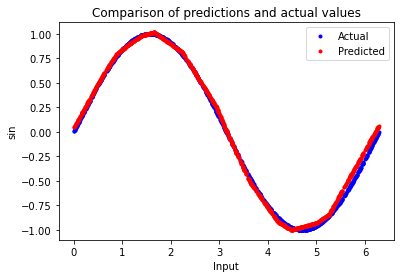

In [28]:
y_actual = np.sin(x_values)
loss = model_2.evaluate(x_values, y_actual)

predictions = model_2.predict(x_values)

plt.title('Comparison of predictions and actual values')
plt.plot(x_values, y_actual,'b.', label="Actual")
plt.plot(x_values,predictions,'r.',label="Predicted")
plt.xlabel('Input')
plt.ylabel('sin')
plt.legend()
plt.show()

In [55]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()
# Save the model to disk
with open("sine_model.tflite", "wb") as f1:
    f1.write(tflite_model)
# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
# Indicate that we want to perform the default optimizations,
# which include quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
    # Each scalar value must be inside of a 2D array that is wrapped in a list
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
tflite_model = converter.convert()
# Save the model to disk
with open("sine_model_quantized.tflite", "wb") as f2:
    f2.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Fury\AppData\Local\Temp\tmp5p6u95rt\assets


INFO:tensorflow:Assets written to: C:\Users\Fury\AppData\Local\Temp\tmp5p6u95rt\assets


INFO:tensorflow:Assets written to: C:\Users\Fury\AppData\Local\Temp\tmpkiitri2x\assets


INFO:tensorflow:Assets written to: C:\Users\Fury\AppData\Local\Temp\tmpkiitri2x\assets
